In [2]:
# Such that changes in external libraries get updated
%load_ext autoreload
%autoreload 2

import sys
# External functions for parsing full-wave solver output (and Mithra output)
sys.path.append('/home/arnau/documents/ETHZ/Semester_Project_Master_Thesis/plotMithraPy')
import plotMiFuncs as pmf
sys.path.append('/home/arnau/documents/ETHZ/Semester_Project_Master_Thesis/pyOPALTools')
from opal.parser.H5Parser import H5Parser

import matplotlib.pyplot as plt

# Such that backgrounds of plots are white and not transparent
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

from datetime import date
import numpy as np
import pandas as pd
import os

raw_data = []

###########################################################################################
###########################################################################################
# Instantiate basic stuff
fs = 14
footnote = 'Albà, ' + str(date.today())
for_report = True
pltpath = 'tests/plots'

tmplFn = 'tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=#'
tmplLeg = 'Test N=5e5, FWHM = .3 ps, sigr = #'
raw_data.append([tmplFn.replace('#', '0.1'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '0.3'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '0.5'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '0.7'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '0.9'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '1.1'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '1.3'), tmplLeg.replace('#', '0.1')])
raw_data.append([tmplFn.replace('#', '1.5'), tmplLeg.replace('#', '0.1')])
# raw_data.append( ['tests/wig', 'Test N=1e5, sigr = .6 mm, FWHM = 1.6 ps' ] )

###########################################################################################
###########################################################################################

leg = []
fnames = []
for i in raw_data:
    fnames.append( i[0])
    leg.append( i[1] )

print(footnote)
# Create folder for plots if it doesn't exist
if not os.path.exists(pltpath):
    os.mkdir(pltpath)
    print("Created folder " + pltpath)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Albà, 2020-07-10


0


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.1/undulator_stats.txt
1
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.3/undulator_stats.txt
2
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.5/undulator_stats.txt
3
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.7/undulator_stats.txt
4
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.9/undulator_stats.txt
5
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.1/undulator_stats.txt
6
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.3/undulator_stats.txt
7
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.5/undulator_stats.txt


gamma_ =  11.16955925223641 , and gamma =  86.10567514677103


-0.011169559252236411 0.011169559252236411
-0.005 0.005
-0.005 0.005


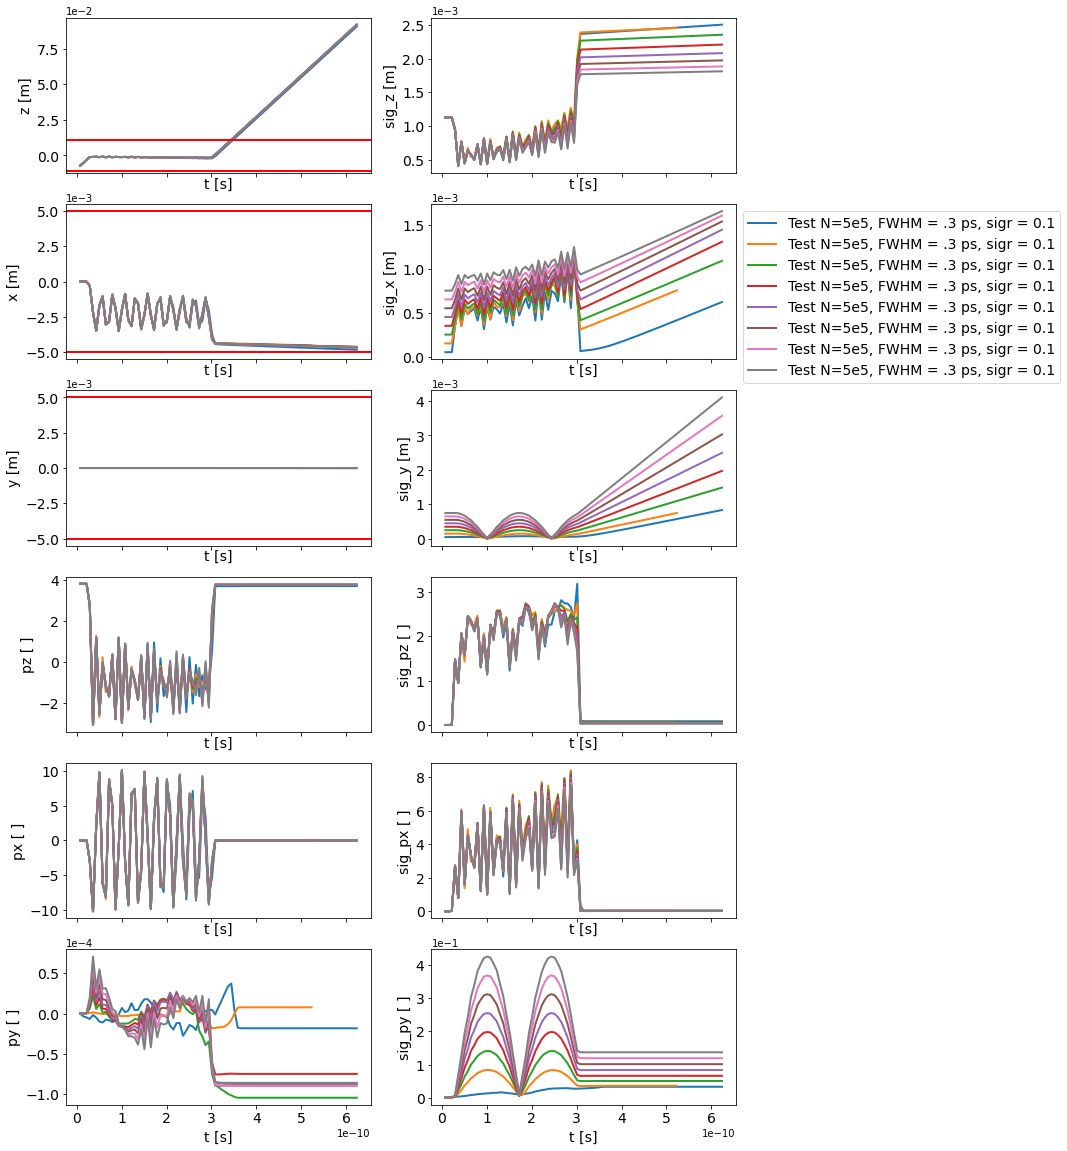

In [3]:
stats = []     
for i, fname in enumerate(fnames):
    print(i)
    stats.append( pmf.importStat( fname + '/undulator_stats.txt', show = True) )

names = [ 'z', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
dotted = []  # Indexes from fnames to plot with dotted lines
Ls = [10e-3, 10e-3, 2e-3]  # Limits of copmutationsl domain
E = 44
K = 10.81
gamma_ = E / .511 / np.sqrt(1 + .5 * K**2)
print('gamma_ = ', gamma_, ', and gamma = ', E / .511)
Ls[2] *= gamma_  # * gamma_
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = ['t',names[i]], factors = [1, 1], lw = lw, ls = ls )
        legLocal.append(leg[j])
axs[1,1].legend(legLocal, fontsize = fs, bbox_to_anchor = [1., 1.])
# Draw copmutational mesh limits
for j in range(3):
    i  = (2 + j) % 3
    print(-.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    # axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()


In [28]:
# Get screen data
r_data = raw_data[-1]
[data, screens] = pmf.importScreen( r_data[0] + '/bunch-profile/bunch-p#-screen#.txt', show = True )


columns =  ['x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  1 , number of processors =  4
0 tests/wig/bunch-profile/bunch-p#-screen0.txt
Screens at  [0]


In [ ]:
fig, ax = plt.subplots(figsize = ( 10, 4 ))
[x,y] = pmf.plotScreen(ax, data, ['t', 'E'], screenNum = 0, type = 'hist2d', factors = [-1e12,1e-6], nbins = 200, color = 1, fs = fs)

print('num particles = ', len(x))
# fig.suptitle(r_data[0] + ', ' + r_data[1], fontsize = fs)
# plt.savefig( (pltpath + '/befAft_noLetters.png'), bbox_inches='tight' )    
plt.show()

Plotting tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.1


499998 particles has been reduced to 50105
Plotting tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.3


4999995 particles has been reduced to 501065


Plotting tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.5


499998 particles has been reduced to 49842
Plotting tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.7


499998 particles has been reduced to 50316


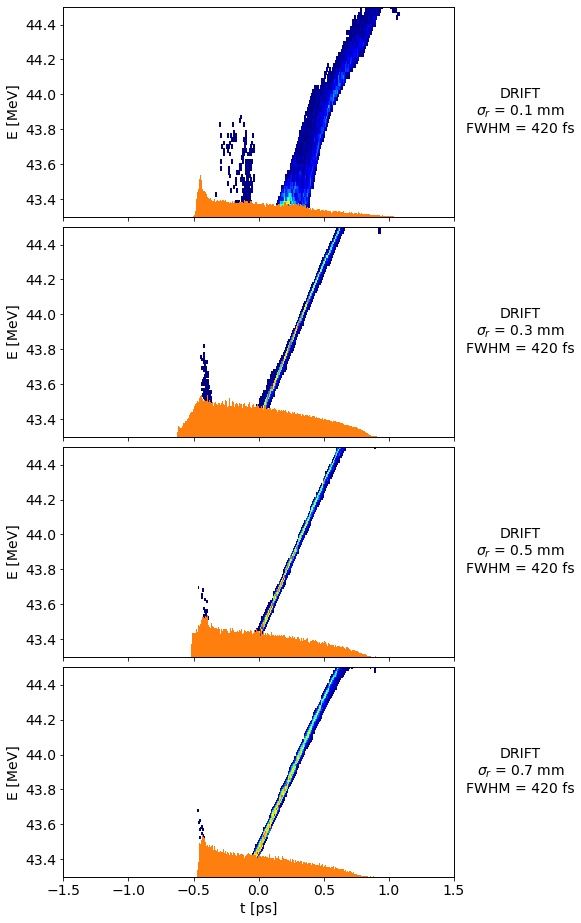

In [33]:
# All cases
fileFW  = '/bunch-profile/bunch-p#-screen#.txt'
qx = 't'
qy = 'E'

saveFN = 'drift_FWHM_1600fs_part2.png'
saveFN = 'test.png'
fnamesLoc = fnames
fnamesLoc = fnamesLoc[:4]

fig, ax = plt.subplots(len(fnamesLoc), sharex = True, figsize = (7, 4 * len(fnamesLoc)))
fig.subplots_adjust(hspace = .05)
for i,fn in enumerate(fnamesLoc):
    print('Plotting', fn)
    [x,y] = pmf.importScreenXY( fn + fileFW, show = False, xquant = qx, yquant = qy, index_screen = -1, reduce_factor = 10, sliceT = [] )
    pmf.plotScreenXY(ax[i], x, y, [qx, qy], type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 200, color = 1, maxHH = .2, enable_cbar = 0)
    ax[i].set_xlabel('')
    ax[i].set_xlim(left = -1.5, right = 1.5)
    ax[i].set_ylim(bottom = 43.3, top = 44.5)
    ax[i].text(1.17, .4, 'DRIFT\n$\sigma_r$ = ' + fn.split('/wig_sigr=')[-1] + ' mm\nFWHM = '
               + (fn.split('fs')[0]).split('FWHM=')[-1] + ' fs', fontsize = fs, ha='center', transform = ax[i].transAxes)
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')
ax[-1].set_xlabel('t [ps]', fontsize = fs)

plt.savefig((pltpath + '/' + saveFN),bbox_inches='tight')



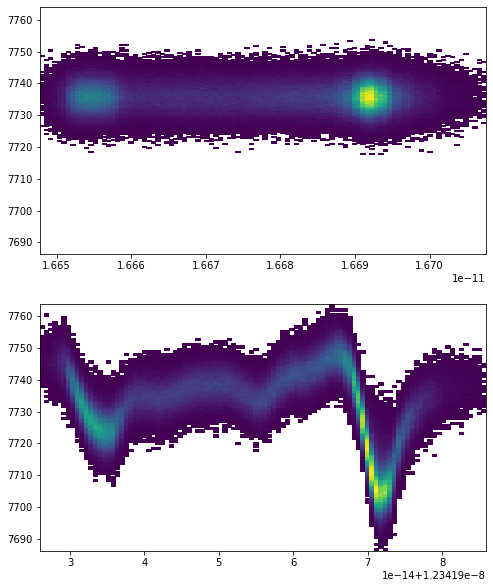

In [3]:
h5p = H5Parser()
fig, axs = plt.subplots(2, figsize = (8, 10), sharex = False, sharey = True)
h5p.parse('tests/testOPAL/SCREEN1.h5', False)
x =  h5p.getStepDataset( dsetName = 'time', step = 0)
y =  h5p.getStepDataset( dsetName = 'pz', step = 0)
axs[0].hist2d(x, y, bins = 100, cmin = 1)
h5p.parse('tests/testOPAL/SCREEN2.h5', False)
x =  h5p.getStepDataset( dsetName = 'time', step = 0)
y =  h5p.getStepDataset( dsetName = 'pz', step = 0)
axs[1].hist2d(x, y, bins = 100, cmin = 1)
plt.show()


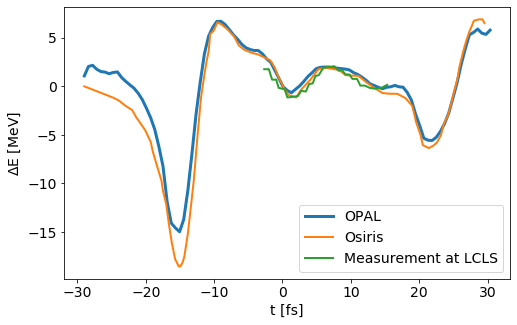

In [4]:
# Plot modulation of end screen
h5p = H5Parser()
h5p.parse('tests/testOPAL/SCREEN2.h5', False)
x = h5p.getStepDataset( dsetName = 'time', step = 0)
y = np.array(h5p.getStepDataset( dsetName = 'px', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'py', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'pz', step = 0))**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)

fig, ax = plt.subplots(figsize = ( 8, 5 ), sharey = False, sharex = False )
pmf.plotScreenXY( ax, x, y, ['t', 'E'], type = 'mod', factors = [-1e15,1e-6], nbins = 100, color = 1, lw = 3)
# Plot data from paper
osiris = pd.read_csv('paper/Osiris.csv', names = ['t', 'dE'])
osiris = osiris.sort_values( by = ['t']  )
meas = pd.read_csv('paper/Measurement.csv', names = ['t', 'dE'])
meas = meas.sort_values( by = ['t']  )
shift = 29  # Shift data horizontally because I don't understand the convention to choose the center in the paper
ax.plot(osiris['t'] - shift, osiris['dE'], lw = 2)
ax.plot(meas['t'] - shift, meas['dE'], lw = 2)
# ax.scatter(meas['t'] - shift, meas['dE'], s = 40, marker = 'o', color = 'k')
ax.legend(['OPAL', 'Osiris', 'Measurement at LCLS'], fontsize = fs)

# plt.savefig( (pltpath + '/comparisonThesis.png'), bbox_inches='tight' )    
plt.show()

tests/testOPAL/macArthur.stat
0 t  [ ns ]
1 s  [ m ]
2 numParticles  [   ]
3 charge  [   ]
4 energy  [ MeV ]
5 rms_x  [ m ]
6 rms_y  [ m ]
7 rms_s  [ m ]
8 rms_px  [   ]
9 rms_py  [   ]
10 rms_ps  [   ]
11 emit_x  [ m ]
12 emit_y  [ m ]
13 emit_s  [ m ]
14 mean_x  [ m ]
15 mean_y  [ m ]
16 mean_s  [ m ]
17 ref_x  [ m ]
18 ref_y  [ m ]
19 ref_z  [ m ]
20 ref_px  [   ]
21 ref_py  [   ]
22 ref_pz  [   ]
23 max_x  [ m ]
24 max_y  [ m ]
25 max_s  [ m ]
26 xpx  [   ]
27 ypy  [   ]
28 zpz  [   ]
29 Dx  [ m ]
30 DDx  [   ]
31 Dy  [ m ]
32 DDy  [   ]
33 Bx_ref  [ T ]
34 By_ref  [ T ]
35 Bz_ref  [ T ]
36 Ex_ref  [ MV/m ]
37 Ey_ref  [ MV/m ]
38 Ez_ref  [ MV/m ]
39 dE  [ MeV ]
40 dt  [ ns ]
41 partsOutside  [   ]


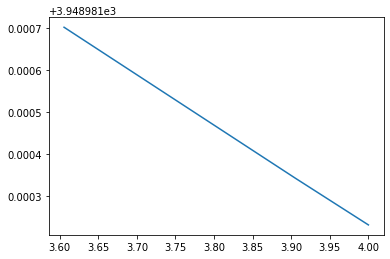

In [5]:
def getStats(fn, show = False):
    print(fn)
    text = open( fn, 'r' )
    names = []
    units = []
    for line in text:
        if 'name' in line:
            ind1 = line.find('=')
            ind2 = line.find(',')
            name = line[ind1+1:ind2]
        if 'units' in line:
            ind1 = line.find('=')
            ind2 = line.find(',')
            unit = line[ind1+1:ind2]
            if unit == '1':
                unit = ' '
            names.append( name )
            units.append( unit )
    if show:
        for i, n in enumerate(names):        
            print( i, n, ' [', units[i], ']' )
    stat = pd.read_csv( filepath_or_buffer = fn,
                        skiprows = 279, sep = '\\s+', names = names)
    return[stat, names, units]

[stats, names, un] = getStats('tests/testOPAL/macArthur.stat', True)

plt.plot(stats['s'], stats['energy'])
plt.show()

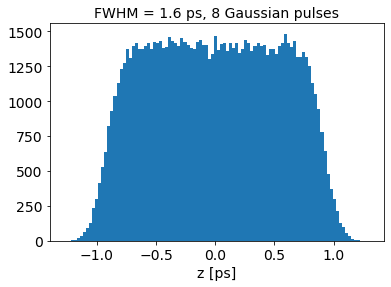

In [167]:
init = pd.read_csv('tests/wig/data/wig_DIST.dat', delim_whitespace = True , skiprows = 2, names = ['x', 'px', 'y', 'py', 'z', 'pz'] )
plt.title('FWHM = 1.6 ps, 8 Gaussian pulses', fontsize = fs)
# print(init)
plt.hist(init['z'] * 1e12 / 3e8, bins = 100)
plt.xlabel('z [ps]', fontsize = fs)
plt.tick_params(axis = 'both', labelsize = fs)
plt.savefig( (pltpath + '/initialDistExample.png'), bbox_inches='tight' )    
plt.show()

11.16955925223641


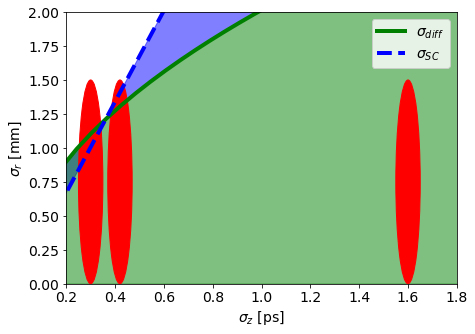

In [10]:
# Plot diffraction size and other parameters
def sigDiff (lu, sigz):
    return np.sqrt(lu / (2 * np.pi) * sigz)
def gamma0(E, K):
    return E / .511 / np.sqrt(1 + .5 * K**2)    
def sigSC (E, K, sigz):
    return gamma0(E, K) * sigz
def lr (lu, E, K):
    return lu / 2 / gamma0(E, K)**2

E = 44
K = 10.81
lu = 8.5e-2
cLight = 3e8
print(gamma0(E, K))
# sigzOverC = np.array([0, 300, 420, 800, 1600, 3200, 6400])
sigz = cLight * 1e-15 * np.linspace(0, 6000, 100)

fig, ax = plt.subplots(figsize = (7, 5))
lw = 4
ax.plot(sigz / cLight * 1e12, sigDiff(lu, sigz) * 1e3, lw = lw, color = 'g')
ax.plot(sigz / cLight * 1e12, sigSC(E, K, sigz) * 1e3, lw = lw, color = 'b', linestyle = '--')
lrPos = lr(lu, E, K) / cLight * 1e12 / 2 / np.pi
ax.axvline(lrPos, color = 'b')
# ax.text(lrPos * 1.11, 7, r'$\frac{\lambda_r}{2\pi}$', fontsize = 23, color = 'b')
vacR = 10e-3
ax.axhline(vacR * 1e3, color = 'r')
# ax.text(.5, vacR * 1e3 * .95, 'Vacuum Tube', fontsize = fs, color = 'r')
ax.legend(['$\sigma_{diff}$', '$\sigma_{SC}$'], fontsize = fs)

ax.fill_between(sigz / cLight * 1e12, sigDiff(lu, sigz) * 1e3, sigSC(E, K, sigz) * 1e3,
                where = sigSC(E, K, sigz) < vacR, color = 'b', alpha = .5)
# ax.text(3.1, 6, 'Theory says\nnegligible CSR.\nOnly SC effects as\nin bunch with reduced $\gamma$', fontsize = fs, color = 'b')

sDLoc = sigDiff(lu, sigz)
for i,_ in enumerate(sigz):
    if sigz[i] <= lr(lu, E, K) / 2 / np.pi:
        sDLoc[i] = 0
ax.fill_between(sigz / cLight * 1e12, np.zeros(len(sigz)), sDLoc * 1e3,
                where = sigSC(E, K, sigz) < vacR,  color = 'g', alpha = .5)
# ax.text(3.1, 1, 'Theory says\nnon-negligible CSR', fontsize = fs, color = 'g')

# ax.set_ylim(bottom = 0, top = 10.2)
ax.set_xlim(left = .2, right = 1.8)
ax.set_ylim(bottom = 0, top = 2)
import matplotlib.patches as patches
ax.add_patch(patches.Ellipse((.3, .75), .1, 1.5, color = 'r'))
ax.add_patch(patches.Ellipse((.42, .75), .1, 1.5, color = 'r'))
ax.add_patch(patches.Ellipse((1.6, .75), .1, 1.5, color = 'r'))
ax.set_xlabel('$\sigma_z$ [ps]', fontsize = fs)
ax.set_ylabel('$\sigma_r$ [mm]', fontsize = fs)
ax.tick_params(axis = 'both', labelsize = fs)
plt.savefig( (pltpath + '/sizeParameters_zoom.png'), bbox_inches='tight' )    
plt.show()

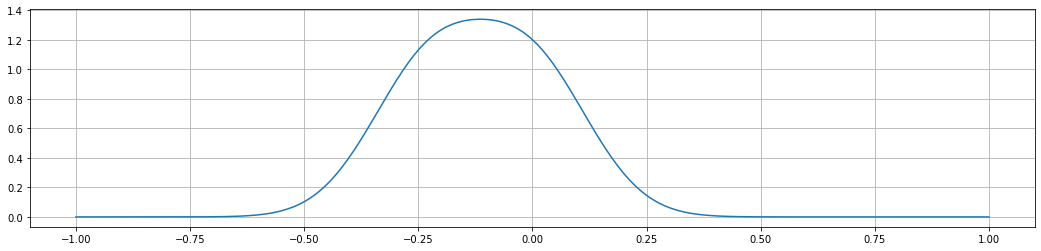

In [129]:
def gauss(x, mu = 0, sigma = 1):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(-1, 1, 300)
FWHM = .3
sep = .228
num = 2
fct = np.zeros(len(x))
for i in range(num):
    fct += gauss(x, mu = -sep * (num//2) + i*sep,  sigma = FWHM / 2.355)

fig, ax = plt.subplots(figsize = (18,4))
ax.plot(x,fct)
ax.grid()
plt.show()


['0.1', '0.3', '0.5', '0.7', '0.9', '1.1', '1.3', '1.5']
Doing  tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=--radius--/bunch-profile/bunch-p#-screen#.txt
tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.1/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.3/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.5/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.7/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.9/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.1/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.3/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.5/bunch-profile/bunch-p#-screen#.txt


Doing  tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=--radius--/bunch-profile/bunch-p#-screen#.txt
tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.1/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.3/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.5/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.7/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.9/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=1.1/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=1.3/bunch-profile/bunch-p#-screen#.txt


tests/wig_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=1.5/bunch-profile/bunch-p#-screen#.txt


Doing  tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=--radius--/bunch-profile/bunch-p#-screen#.txt
tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.1/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.3/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.5/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.7/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=0.9/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.1/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.3/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=420fs_sigr=0.1:1.5:0.2/wig_sigr=1.5/bunch-profile/bunch-p#-screen#.txt


Doing  tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=--radius--/bunch-profile/bunch-p#-screen#.txt
tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.1/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.3/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.5/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.7/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=0.9/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=1.1/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=1.3/bunch-profile/bunch-p#-screen#.txt


tests/drift_FWHM=1600fs_sigr=0.1:1.5:0.2/wig_sigr=1.5/bunch-profile/bunch-p#-screen#.txt


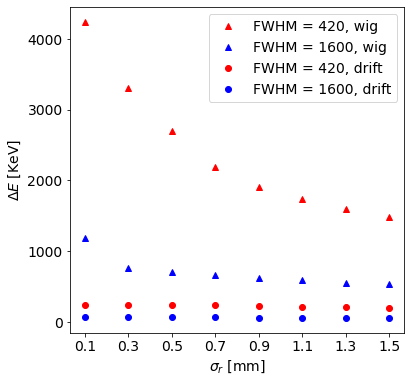

In [28]:
fn = 'tests/--mode--_FWHM=--length--fs_sigr=0.1:1.5:0.2/wig_sigr=--radius--/bunch-profile/bunch-p#-screen#.txt'
modes = ['wig', 'drift']
lengths = [420, 1600]
radii = ['0.1', '0.3', '0.5', '0.7', '0.9', '1.1', '1.3', '1.5']
print(radii)
legend = []
fig, ax = plt.subplots(figsize = (6, 6))
for mode in modes:
    for length in lengths:
        dE = np.zeros(len(radii))
        fni = fn
        fni = fni.replace('--length--', str(length))
        fni = fni.replace('--mode--', mode)
        print('Doing ', fni)
        for j, radius in enumerate(radii):
            fnj = fni.replace('--radius--', str(radius))
            print(fnj)
            [t,E] = pmf.importScreenXY(fnj, show = False, xquant = 't', yquant = 'E', index_screen = -1, reduce_factor = 1, sliceT = [])
            dE[j] = (np.max(E) - np.min(E)) * 1e-3
        if mode == 'drift':
            mk = 'o'
        else:
            mk = '^'
        if length == 420:
            cl = 'r'
        else:
            cl = 'b'
        ax.plot(radii, dE, marker = mk, linestyle = 'None', color = cl)
        legend.append('FWHM = ' + str(length) + ', ' + mode)

ax.legend(legend, fontsize = fs)
ax.set_xlabel('$\sigma_r$ [mm]', fontsize = fs)
ax.set_ylabel('$\Delta E$ [KeV]', fontsize = fs)
ax.tick_params(axis = 'both', labelsize = fs)
plt.savefig( (pltpath + '/dE_sigr.png'), bbox_inches='tight' )    
plt.show()
